In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime,date

from glob import glob

import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime,date,timedelta
%matplotlib inline

b'Skipping line 305: expected 57 fields, saw 72\nSkipping line 306: expected 57 fields, saw 72\nSkipping line 307: expected 57 fields, saw 72\nSkipping line 308: expected 57 fields, saw 72\nSkipping line 309: expected 57 fields, saw 72\nSkipping line 310: expected 57 fields, saw 72\nSkipping line 311: expected 57 fields, saw 72\nSkipping line 312: expected 57 fields, saw 72\nSkipping line 313: expected 57 fields, saw 72\nSkipping line 314: expected 57 fields, saw 72\nSkipping line 315: expected 57 fields, saw 72\nSkipping line 316: expected 57 fields, saw 72\nSkipping line 317: expected 57 fields, saw 72\nSkipping line 318: expected 57 fields, saw 72\nSkipping line 319: expected 57 fields, saw 72\nSkipping line 320: expected 57 fields, saw 72\nSkipping line 321: expected 57 fields, saw 72\nSkipping line 322: expected 57 fields, saw 72\nSkipping line 323: expected 57 fields, saw 72\nSkipping line 324: expected 57 fields, saw 72\nSkipping line 325: expected 57 fields, saw 72\nSkipping li

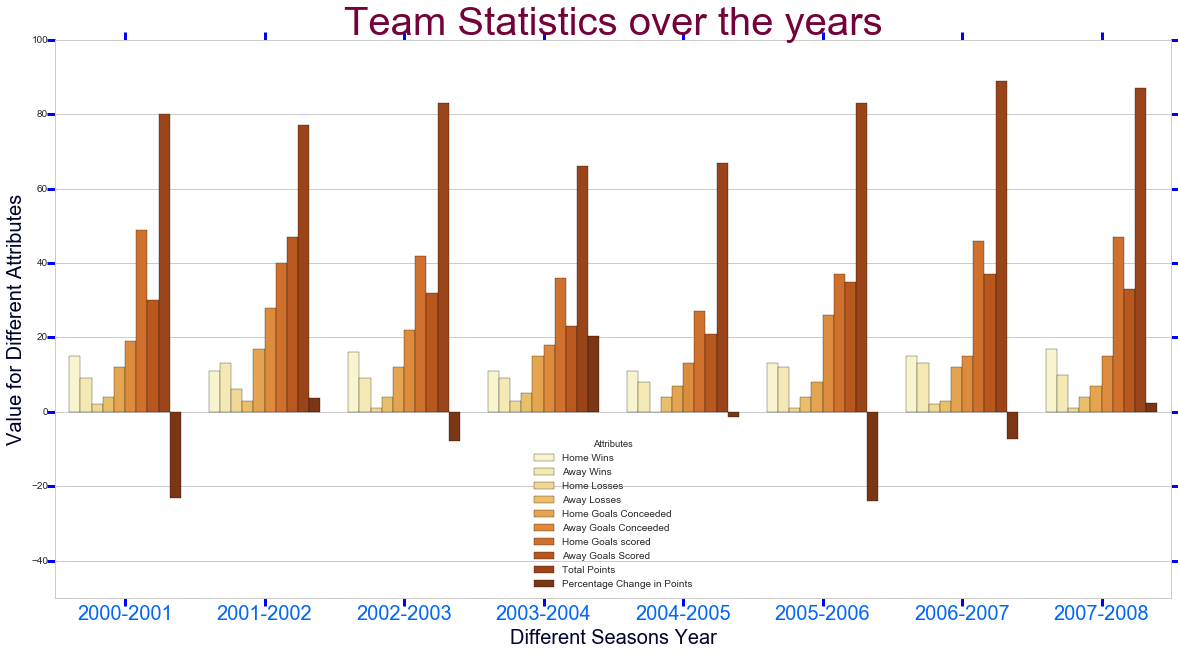

In [62]:
Team_Name = "Man United"

Attribute_columns = ['Season Year', 'Home Wins','Away Wins','Home Losses','Away Losses','Home Goals Conceeded','Away Goals Conceeded','Home Goals scored','Away Goals Scored','Total Points','Percentage Change in Points']
Attributes_all_years = pd.DataFrame(np.nan,index=[0], columns=Attribute_columns)
Attributes_single_year = list(range(11))

previous_Total_points = 65

loop_count = 0

for raw_file_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Data\*.csv",):
    _EPL_Year_df = pd.read_csv(raw_file_,error_bad_lines=False)
    
    season_year = raw_file_.split('\\')[-1].split('.')[0].split('_')[1]

    #Analysis #1 Get only set of Data Needed
    Analysis_1_Data = _EPL_Year_df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

    _All_Matches_ = Analysis_1_Data.loc[(Analysis_1_Data["HomeTeam"] == Team_Name) | (Analysis_1_Data["AwayTeam"] == Team_Name)]

    _Home_Matches_ = _All_Matches_.loc[(_All_Matches_["HomeTeam"] == Team_Name)]
    _Away_Matches_ = _All_Matches_.loc[(_All_Matches_["AwayTeam"] == Team_Name)]

    Home_Wins = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "H")]
    Home_Win_Count = Home_Wins.FTR.count()

    Home_loss = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "A")]
    Home_loss_Count = Home_loss.FTR.count()

    Home_draw = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "D")]
    Home_draw_Count = Home_draw.FTR.count()

    Away_Wins = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "A")]
    Away_Wins_Count = Away_Wins.FTR.count()

    Away_loss = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "H")]
    Away_loss_Count = Away_loss.FTR.count()

    Away_draw = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "D")]
    Away_draw_Count = Away_draw.FTR.count()

    Home_Goals_scored = _Home_Matches_.FTHG.sum()
    Away_Goals_scored = _Away_Matches_.FTAG.sum()
    Home_Goals_conceeded = _Home_Matches_.FTAG.sum()
    Away_Goals_conceeded = _Away_Matches_.FTHG.sum()

    Total_Points = ((Home_Win_Count + Away_Wins_Count) * 3) + Home_draw_Count + Away_draw_Count
    Percentage_change_points = ((previous_Total_points - Total_Points)/previous_Total_points) * 100
    previous_Total_points = Total_Points
    
    Attributes_single_year[0] = season_year
    Attributes_single_year[1] = Home_Win_Count
    Attributes_single_year[2] = Away_Wins_Count
    Attributes_single_year[3] = Home_loss_Count
    Attributes_single_year[4] = Away_loss_Count
    Attributes_single_year[5] = Home_Goals_conceeded
    Attributes_single_year[6] = Away_Goals_conceeded
    Attributes_single_year[7] = Home_Goals_scored
    Attributes_single_year[8] = Away_Goals_scored
    Attributes_single_year[9] = Total_Points
    Attributes_single_year[10] = Percentage_change_points
    
    single_year_df = pd.DataFrame([Attributes_single_year],columns=Attribute_columns)

    Attributes_all_years = Attributes_all_years.append([single_year_df],ignore_index=True)
    
    loop_count += 1
    if loop_count == 8: break
    
Attributes_all_years = Attributes_all_years.drop(Attributes_all_years.index[0])

Attributes_all_years = Attributes_all_years.reset_index()

req_cols = ['Home Wins', 'Away Wins', 'Home Losses', 'Away Losses','Home Goals Conceeded', 'Away Goals Conceeded', 'Home Goals scored','Away Goals Scored', 'Total Points','Percentage Change in Points']
all_df = []

for col in req_cols:
    temp_df = Attributes_all_years[['Season Year',col]]
    temp_df = temp_df.rename(columns={col:'Season Statistics'})
    temp_df['Attributes'] = col
    all_df.append(temp_df)
f_df = pd.concat(all_df)

f, ax = plt.subplots(figsize=(20,10),dpi=96)
sns.set_style('whitegrid')
#sns.color_palette('afmhot')

sns.barplot(x='Season Year',y='Season Statistics',hue= 'Attributes',data=f_df,palette="YlOrBr")
ax.set_title('Team Statistics over the years',fontsize=40,color='#730039')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, fontsize=20, color='#0165fc')
plt.xlabel('Different Seasons Year', fontsize=20, color='#00022e')
plt.ylabel('Value for Different Attributes', fontsize=20, color='#00022e')
plt.ylim([-50,100])
plt.tick_params(axis='both',which='major', width=3,length=8,color='b')

Attributes_all_years_file = "C:\Data Analysis\Sujay_DataAnalysis\Final_Exam\Output\Analysis_1.csv"
Attributes_all_years.to_csv(Attributes_all_years_file, sep=',', encoding='utf-8')

plt.savefig(r'C:\Data Analysis\Sujay_DataAnalysis\Final\Output\Analysis1.jpeg')


#plt.tick_params(which='major', length=7)
#plt.tick_params(which='minor', length=10, color='r')

#sns.barplot(x='Season Year',y='values_to_plot',label = 'Season',data=f_df)
#sns.barplot(x='hue',y='values_to_plot',label = 'hue data',data=f_df)

#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
#sns.despine(left=True, bottom=True)

#all_years

In [ ]:
#Analysis 2 

In [7]:
Team_Name1 = "Chelsea"

_manger_file_ = r"C:\Data Analysis\Sujay_DataAnalysis\Final\Manager\EPL_Managers.csv"
_Raw_file_ = pd.read_csv(_manger_file_)
_EPL_Managers_df = _Raw_file_[['Name','Club','From','Until','Duration (days)','Years in Premier League']]

_Team_Managers_ = _EPL_Managers_df[_EPL_Managers_df['Club'] == Team_Name1]

Managers_subset  = _Team_Managers_[['Name','From','Until']]
Managers_From_Until_df = Managers_subset.reset_index(drop=True)
Managers_From_Until_df.loc[len(Managers_From_Until_df) - 1 :,'Until'] = datetime.now().strftime("%d-%b-%y")
Managers_From_Until_df['From'] = Managers_From_Until_df['From'].apply(lambda X: datetime.strptime(X, "%d-%b-%y").date().strftime("%d/%m/%y"))
Managers_From_Until_df['Until'] = Managers_From_Until_df['Until'].apply(lambda X: datetime.strptime(X, "%d-%b-%y").date().strftime("%d/%m/%y"))

Managers_From_Until_df

,Name,From,Until
0,Ian Porterfield,11/06/91,15/02/93
1,David Webb,15/02/93,11/05/93
2,Glenn Hoddle,04/06/93,10/05/96
3,Ruud Gullit,10/05/96,12/02/98
4,Gianluca Vialli,12/02/98,12/09/00
5,Graham Rix,13/09/00,17/09/00
6,Ray Wilkins,13/09/00,17/09/00
7,Claudio Ranieri,18/09/00,31/05/04
8,José Mourinho,02/06/04,20/09/07
9,Avram Grant,29/09/07,24/05/08


In [8]:
def GetYearFormat(x):
    ret_str = ""
    temp = x.split('/')[-1]
    if temp <= '16':
        ret_str = "20" + str(temp)
    elif temp > '16':
        ret_str = "19" + str(temp)
    else:
        ret_str = str(temp)
    return ret_str

def change_time(time):
    return datetime.strptime(time, "%d/%m/%y").timestamp()
    
    
Manager_year = Managers_From_Until_df[['From','Until']]
Manager_year['StartYear'] = Manager_year.apply(lambda X: GetYearFormat(X['From']), axis=1)
Manager_year['EndYear'] = Manager_year.apply(lambda X: GetYearFormat(X['Until']), axis=1)

Manager_year['FromEpoch'] = Manager_year.apply(lambda X: change_time(X['From']), axis=1)
Manager_year['UntilEpoch'] = Manager_year.apply(lambda X: change_time(X['Until']), axis=1)

Manager_year


,From,Until,StartYear,EndYear,FromEpoch,UntilEpoch
0,11/06/91,15/02/93,1991,1993,6.766128e+08,7.297524e+08
1,15/02/93,11/05/93,1993,1993,7.297524e+08,7.370928e+08
2,04/06/93,10/05/96,1993,1996,7.391664e+08,8.317008e+08
3,10/05/96,12/02/98,1996,1998,8.317008e+08,8.872596e+08
4,12/02/98,12/09/00,1998,2000,8.872596e+08,9.687312e+08
5,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
6,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
7,18/09/00,31/05/04,2000,2004,9.692496e+08,1.085976e+09
8,02/06/04,20/09/07,2004,2007,1.086149e+09,1.190261e+09
9,29/09/07,24/05/08,2007,2008,1.191038e+09,1.211602e+09


In [9]:
merged_manager = pd.merge(Managers_From_Until_df,Manager_year)

_MANGERS_and_Year = merged_manager[merged_manager['StartYear'] >= '2000'].reset_index(drop=True)
_MANGERS_and_Year

,Name,From,Until,StartYear,EndYear,FromEpoch,UntilEpoch
0,Graham Rix,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
1,Graham Rix,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
2,Ray Wilkins,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
3,Ray Wilkins,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
4,Claudio Ranieri,18/09/00,31/05/04,2000,2004,9.692496e+08,1.085976e+09
5,José Mourinho,02/06/04,20/09/07,2004,2007,1.086149e+09,1.190261e+09
6,Avram Grant,29/09/07,24/05/08,2007,2008,1.191038e+09,1.211602e+09
7,Luiz Felipe Scolari,01/07/08,09/02/09,2008,2009,1.214885e+09,1.234156e+09
8,Ray Wilkins,09/02/09,16/02/09,2009,2009,1.234156e+09,1.234760e+09
9,Guus Hiddink,16/02/09,31/05/09,2009,2009,1.234760e+09,1.243742e+09


In [10]:
dup_managers  = _MANGERS_and_Year[['Name','From','Until','StartYear','EndYear','FromEpoch','UntilEpoch']]
_MANGERS_TO_ANALYSE_ = dup_managers.drop_duplicates().reset_index(drop=True)
_MANGERS_TO_ANALYSE_

,Name,From,Until,StartYear,EndYear,FromEpoch,UntilEpoch
0,Graham Rix,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
1,Ray Wilkins,13/09/00,17/09/00,2000,2000,9.688176e+08,9.691632e+08
2,Claudio Ranieri,18/09/00,31/05/04,2000,2004,9.692496e+08,1.085976e+09
3,José Mourinho,02/06/04,20/09/07,2004,2007,1.086149e+09,1.190261e+09
4,Avram Grant,29/09/07,24/05/08,2007,2008,1.191038e+09,1.211602e+09
5,Luiz Felipe Scolari,01/07/08,09/02/09,2008,2009,1.214885e+09,1.234156e+09
6,Ray Wilkins,09/02/09,16/02/09,2009,2009,1.234156e+09,1.234760e+09
7,Guus Hiddink,16/02/09,31/05/09,2009,2009,1.234760e+09,1.243742e+09
8,Carlo Ancelotti,01/06/09,22/05/11,2009,2011,1.243829e+09,1.306037e+09
9,André Villas-Boas,22/06/11,04/03/12,2011,2012,1.308715e+09,1.330837e+09


In [11]:
def change_time_epoch(time):
    return datetime.strptime(time, "%d/%m/%y").timestamp()

def change_time_epoch2(time):
    return datetime.strptime(time, "%d/%m/%Y").timestamp()

def Get_Current_Manger(int_start_year, int_end_year):
    start_year = str(int_start_year)

    Start_year_list = _MANGERS_TO_ANALYSE_.loc[(_MANGERS_TO_ANALYSE_['StartYear'] == start_year)]['Name']
    Manager_name_split = Start_year_list.to_string().split(' ')[-2:]
    Manager_name = ' '.join(Manager_name_split)
    return Manager_name
    
    
def Get_manager(match_epoch, manager_start,manager_end,name):
    Match_day_str = str(match_epoch).split(' ')[-1]   #'990244800.0'
    Manger_start_str = str(float(manager_start.to_string().split(' ')[-1]))   #'9.68818e+08'
    Manger_end_str = str(float(manager_end.to_string().split(' ')[-1]))   #'9.68818e+08'

    if float(Match_day_str) > float(Manger_start_str):
        if float(Match_day_str) < float(Manger_end_str):
            return name
    else:
        print("")

    return "Interim Managers"

cnt = 0

Base_File_Name = "C:\Data Analysis\Sujay_DataAnalysis\Final\Data\\"

Number_of_Managers = len(_MANGERS_TO_ANALYSE_)

for manager_number in range(0,Number_of_Managers):

    name = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['Name']

    Start_year = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['StartYear']
    End_year = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['EndYear']

    int_start_year = int(Start_year)
    int_end_year = int(End_year)

    Start_date = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['FromEpoch']
    End_date = _MANGERS_TO_ANALYSE_.loc[manager_number,:].to_frame().transpose()['UntilEpoch'] 

    No_seasons_in_Charge = int_end_year - int_start_year
    end = int_start_year + 1
    FIle_Name = Base_File_Name + "EPL" + "_" + str(int_start_year) + "-" + str(end) + ".csv"

    Season_file = pd.read_csv(FIle_Name,error_bad_lines=False)

    Analysis_2_Data = Season_file[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

    _All_Matches_ = Analysis_2_Data.loc[(Analysis_2_Data["HomeTeam"] == Team_Name1) | (Analysis_2_Data["AwayTeam"] == Team_Name1)]

    not_first_time = False

    if No_seasons_in_Charge == 0:
        _All_Matches_['DateEpoch'] = _All_Matches_.apply(lambda X: change_time_epoch(X['Date']), axis=1)

        matches_length = len(_All_Matches_['DateEpoch'])
        
        _All_Matches_['Manager'] = _All_Matches_.apply(lambda Y: Get_Current_Manger(int_start_year, int_end_year), axis=1)
        base_file = r"C:\Data Analysis\Sujay_DataAnalysis\Final\Manager_season\\"
        Manager_season_file1 = base_file + "Managers_" + "EPL" + "_" + str(int_start_year) + "-" + str(int_start_year + 1) + ".csv"
            
        _All_Matches_.to_csv(Manager_season_file1, sep=',', encoding='utf-8')
            
    else:
    
        for season_in_charge in range(0,No_seasons_in_Charge + 1):            

            if not_first_time:

                int_start_year = int(Current_year) + 1
                int_end_year = int_start_year + 1
                FIle_Name = Base_File_Name + "EPL" + "_" + str(int_start_year) + "-" + str(int_end_year) + ".csv"
                Season_file = pd.read_csv(FIle_Name,error_bad_lines=False)     
                Analysis_2_Data = Season_file[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR']]

                _All_Matches_ = Analysis_2_Data.loc[(Analysis_2_Data["HomeTeam"] == Team_Name1) | (Analysis_2_Data["AwayTeam"] == Team_Name1)]
            
            date1 = list(_All_Matches_.reset_index(drop=True).loc[0,:].to_frame().transpose()['Date'].to_string().split('/')[-1])

            format_lenght_1 = len(date1)

            if format_lenght_1 > 2:
                _All_Matches_['DateEpoch'] = _All_Matches_.apply(lambda X: change_time_epoch2(X['Date']), axis=1)
            else:
                _All_Matches_['DateEpoch'] = _All_Matches_.apply(lambda X: change_time_epoch(X['Date']), axis=1)
    
    
            
            matches_length = len(_All_Matches_['DateEpoch'])
            _All_Matches_['Manager'] = _All_Matches_.apply(lambda X: Get_manager(X['DateEpoch'],Start_date,End_date,name), axis=1)
                
            not_first_time = True
            base_file = r"C:\Data Analysis\Sujay_DataAnalysis\Final\Manager_season\\"
            Manager_season_file = base_file + "Managers_" + "EPL" + "_" + str(int_start_year) + "-" + str(int_start_year + 1) + ".csv"
            
            _All_Matches_.to_csv(Manager_season_file, sep=',', encoding='utf-8')
            Current_year = int_start_year

        not_first_time = False
        
        
    #cnt += 1
    #if cnt == 10: break

_All_Matches_


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
b'Skipping line 305: expected 57 fields, saw 72\nSkipping line 306: expected 57 fields, saw 72\nSkipping line 307: expected 57 fields, saw 72\nSkipping line 308: expected 57 fields, saw 72\nSkipping line 309: expected 57 fields, saw 72\nSkipping line 310: expected 57 fields, saw 72\nSkipping line 311: expected 57 fields, saw 72\nSkipping line 312: expected 57 fields, saw 72\nSkipping line 313: expected 57 fields, saw 72\nSkipping line 314: expected 57 fields, saw 72\nSkipping line 315: expected 57 fields, saw 72\nSkipping line 316: expected 57 fields, saw 72\nSkipping line 317: expected 57 fields, saw 72\nSkipping line 318: expected 57 fields, saw 72\nSki

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,DateEpoch,Manager
9,15/08/16,Chelsea,West Ham,2,1,H,0,0,D,1.471234e+09,Antonio Conte
16,20/08/16,Watford,Chelsea,1,2,A,0,0,D,1.471666e+09,Antonio Conte
20,27/08/16,Chelsea,Burnley,3,0,H,2,0,H,1.472270e+09,Antonio Conte
38,11/09/16,Swansea,Chelsea,2,2,D,0,1,A,1.473566e+09,Antonio Conte
40,16/09/16,Chelsea,Liverpool,1,2,A,0,2,A,1.473998e+09,Antonio Conte
50,24/09/16,Arsenal,Chelsea,3,0,H,3,0,H,1.474690e+09,Antonio Conte
61,01/10/16,Hull,Chelsea,0,2,A,0,0,D,1.475294e+09,Antonio Conte
72,15/10/16,Chelsea,Leicester,3,0,H,2,0,H,1.476504e+09,Antonio Conte
88,23/10/16,Chelsea,Man United,4,0,H,2,0,H,1.477195e+09,Antonio Conte
98,30/10/16,Southampton,Chelsea,0,2,A,0,1,A,1.477800e+09,Antonio Conte


In [12]:
def Change_manager_str(Manager):
    temp1 = "";temp2 = ""; temp3 = ""
        
    if '[' in Manager:
        temp1 = Manager.replace('[','')
    
    if ']' in temp1:
        temp2 = temp1.replace(']','')
    
    if '\'' in temp2:
        temp3 = temp2.replace('\'','')
        return temp3
    
    return Manager
    
    
    
Manager_columns = ['Manager', 'Wins','Losses','Goals Conceeded','Goals scored']
all_years_managers = pd.DataFrame(np.nan,index=[0], columns=Manager_columns)
single_year_manager = list(range(5))
cnt1 =0

for Manager_file_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Manager_season\*.csv",):
    _Manager_ALL_ = pd.read_csv(Manager_file_,error_bad_lines=False)
    
    year = Manager_file_.split('\\')[-1].split('.')[0].split('_')[1]
    
    All_Manager_Data = _Manager_ALL_[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Manager']]
    
    All_Manager_Data["Manager"] = All_Manager_Data.apply(lambda X: Change_manager_str(X['Manager']), axis=1)
    Managers_Names = All_Manager_Data['Manager'].unique()
    Number_of_mangers = len(Managers_Names)
        
    for count_manager in range(0,Number_of_mangers):
        
        Manager_name = Managers_Names[count_manager]
       
        Manager_Data = All_Manager_Data.loc[(All_Manager_Data["Manager"] == Manager_name)]
        _Home_Matches_ = Manager_Data.loc[(Manager_Data["HomeTeam"] == Team_Name1)]
        _Away_Matches_ = Manager_Data.loc[(Manager_Data["AwayTeam"] == Team_Name1)]

        Home_Wins = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "H")]
        Home_Win_Count = Home_Wins.FTR.count()

        Home_loss = _Home_Matches_.loc[(_Home_Matches_["FTR"] == "A")]
        Home_loss_Count = Home_loss.FTR.count()

        Away_Wins = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "A")]
        Away_Wins_Count = Away_Wins.FTR.count()

        Away_loss = _Away_Matches_.loc[(_Away_Matches_["FTR"] == "H")]
        Away_loss_Count = Away_loss.FTR.count()

        Home_Goals_scored = _Home_Matches_.FTHG.sum()
        Away_Goals_scored = _Away_Matches_.FTAG.sum()
        Home_Goals_conceeded = _Home_Matches_.FTAG.sum()
        Away_Goals_conceeded = _Away_Matches_.FTHG.sum()
        Total_Wins = Home_Win_Count + Away_Wins_Count
        Total_Loss = Home_loss_Count + Away_loss_Count
        Total_Goals_Scored = Home_Goals_scored + Away_Goals_scored
        Total_Goals_Conceeded = Home_Goals_conceeded + Away_Goals_conceeded
        
        single_year_manager[0] = Manager_name
        single_year_manager[1] = Total_Wins
        single_year_manager[2] = Total_Loss
        single_year_manager[3] = Total_Goals_Conceeded
        single_year_manager[4] = Total_Goals_Scored

        single_df = pd.DataFrame([single_year_manager],columns=Manager_columns)
        all_years_managers = all_years_managers.append([single_df],ignore_index=True)
    
    #cnt1 += 1
    #if cnt1 == 2: break

all_years_managers = all_years_managers.drop(all_years_managers.index[0])


all_years_managers_file = "C:\Data Analysis\Sujay_DataAnalysis\Final_Exam\Output\Analysis_2.csv"
all_years_managers.to_csv(all_years_managers_file, sep=',', encoding='utf-8')



C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


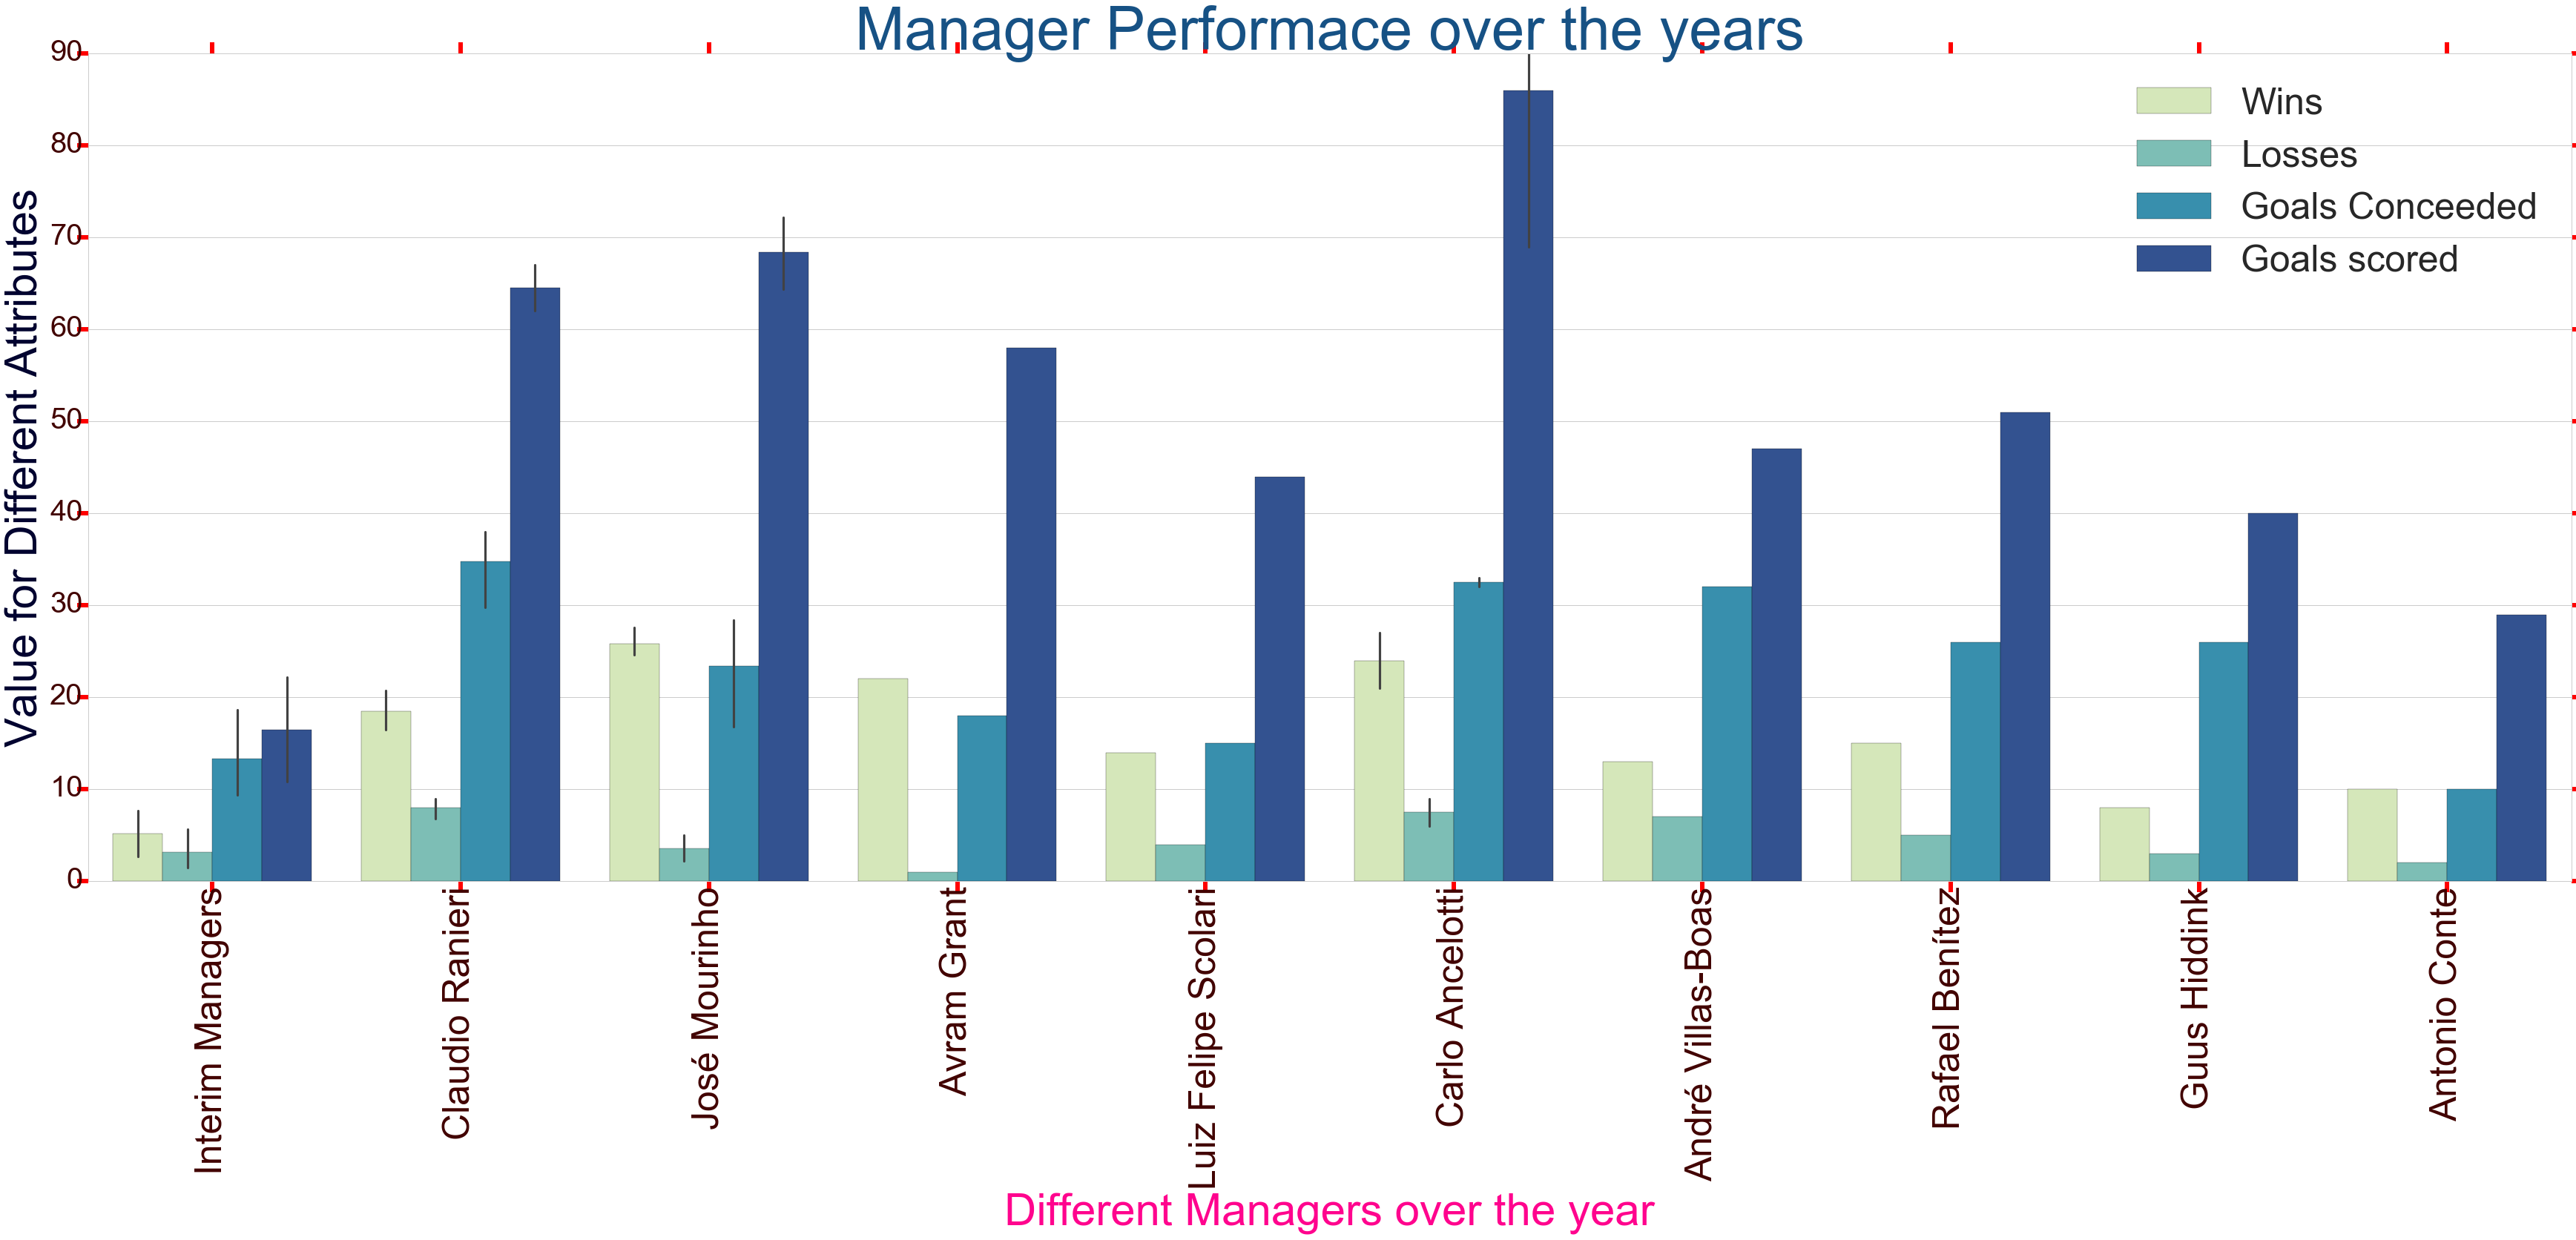

In [13]:
req_cols = ['Wins','Losses','Goals Conceeded', 'Goals scored']
all_df = []

for col in req_cols:
    temp_df = all_years_managers[['Manager',col]]
    temp_df = temp_df.rename(columns={col:'Statistics Values'})
    temp_df['Attributes'] = col
    all_df.append(temp_df)
f_df = pd.concat(all_df)


fig, ax2 = plt.subplots(figsize=(60,20), dpi=150)
sns.set_style('whitegrid')
sns.barplot(x='Manager',y='Statistics Values',hue= 'Attributes',data=f_df,palette="YlGnBu")
#sns.stripplot(x='Manager',y='values_to_plot',hue= 'hue',data=f_df,jitter=True)
#sns.factorplot(x='Manager',y='values_to_plot',hue= 'hue',data=f_df,size=10)

ax2.set_title('Manager Performace over the years',fontsize=80,color='#155084')
labels = ax2.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=50, color='#410200')

labels2 = ax2.get_yticklabels()
plt.setp(labels2, rotation=0, fontsize=40, color='#410200')

plt.xlabel('Different Managers over the year', fontsize=60, color='#ff028d')
plt.ylabel('Value for Different Attributes', fontsize=60, color='#00022e')
plt.ylim([0,90])
plt.tick_params(axis='both',which='major', width=6,length=15,color='r')
plt.legend(loc=1,prop={'size':50})

plt.savefig(r'C:\Data Analysis\Sujay_DataAnalysis\Final\Output\Analysis2.jpeg')

In [ ]:
#Analysis 3

In [75]:
cnt2 = 0
goal_all_list = []

Team_Name_Goals = "Chelsea"

for Goals_file in glob(r"C:\Data Analysis\Sujay_DataAnalysis\Final\Goals\*.csv"):
    Goals_df = pd.read_csv(Goals_file)
    Goals_df = Goals_df.drop(Goals_df.index[0])
    Goals_df['Year'] = Goals_file.split('\\')[-1].split('.')[0].split('_')[-1]
    Goals_df = Goals_df.rename(columns={'Unnamed: 0': 'Teams'})
    Goals_df = Goals_df.rename(columns={'0-10': 'Far in 10 minutes'})
    Goals_df = Goals_df.rename(columns={'0-10.1': 'Aganist in 10 minutes'})
    Goals_df = Goals_df.rename(columns={'20-Nov': 'Far in 20 minutes'})
    Goals_df = Goals_df.rename(columns={'20-Nov.1': 'Aganist in 20 minutes'})
    Goals_df = Goals_df.rename(columns={'21-30': 'Far in 30 minutes'})
    Goals_df = Goals_df.rename(columns={'21-30.1': 'Aganist in 30 minutes'})
    Goals_df = Goals_df.rename(columns={'31-40': 'Far in 40 minutes'})
    Goals_df = Goals_df.rename(columns={'31-40.1': 'Aganist in 40 minutes'})
    Goals_df = Goals_df.rename(columns={'41-50': 'Far in 50 minutes'})
    Goals_df = Goals_df.rename(columns={'41-50.1': 'Aganist in 50 minutes'})
    Goals_df = Goals_df.rename(columns={'51-60': 'Far in 60 minutes'})
    Goals_df = Goals_df.rename(columns={'51-60.1': 'Aganist in 60 minutes'})
    Goals_df = Goals_df.rename(columns={'61-70': 'Far in 70 minutes'})
    Goals_df = Goals_df.rename(columns={'61-70.1': 'Aganist in 70 minutes'})
    Goals_df = Goals_df.rename(columns={'71-80': 'Far in 80 minutes'})
    Goals_df = Goals_df.rename(columns={'71-80.1': 'Aganist in 80 minutes'})
    Goals_df = Goals_df.rename(columns={'81-90': 'Far in 90 minutes'})
    Goals_df = Goals_df.rename(columns={'81-90.1': 'Aganist in 90 minutes'})
    
    temp_goals_df = Goals_df[:]
    temp_goals_df = temp_goals_df.ix[temp_goals_df['Teams'].str.contains(Team_Name_Goals)]
    goal_all_list.append(temp_goals_df)

    cnt2 +=1
    if cnt2 == 5: break
        
        
Final_goal_df = pd.concat(goal_all_list)   
Final_goal_df.reset_index()


#Final_goal_df_file = r"C:\Users\Hp\Desktop\New folder\test.csv"
#Final_goal_df.to_csv(Final_goal_df_file, sep=',', encoding='utf-8')
#inal_goal_df.to_csv()
Final_goal_df

,Teams,Far in 10 minutes,Aganist in 10 minutes,Far in 20 minutes,Aganist in 20 minutes,Far in 30 minutes,Aganist in 30 minutes,Far in 40 minutes,Aganist in 40 minutes,Far in 50 minutes,Aganist in 50 minutes,Far in 60 minutes,Aganist in 60 minutes,Far in 70 minutes,Aganist in 70 minutes,Far in 80 minutes,Aganist in 80 minutes,Far in 90 minutes,Aganist in 90 minutes,Year
7,Chelsea,3,3,4,3,11,2,4,2,9,6,11,2,11,1,14,2,5,1,2005-2006
6,Chelsea,5,1,6,3,5,2,8,2,8,4,7,3,10,3,6,3,9,3,2006-2007
6,Chelsea,5,1,9,4,5,1,4,1,9,4,9,3,9,2,9,3,6,7,2007-2008
5,Chelsea,7,3,5,2,8,0,7,1,10,3,12,3,6,4,6,2,7,6,2008-2009
7,Chelsea,5,6,5,5,8,4,5,0,9,5,7,4,9,1,6,2,15,6,2009-2010


In [76]:
league_all_list = []

League_File = r"C:\Data Analysis\Sujay_DataAnalysis\Final\League_Table\League_2013-2014.csv"
League_df = pd.read_csv(League_File)
League_df['Year'] = League_File.split('\\')[-1].split('.')[0].split('_')[-1]

temp_pos_df = League_df[['Year','Pos','Team']]
temp_pos_df.ix[temp_pos_df['Team'].str.contains('Chelsea')]

league_all_list.append(temp_df)

f_df = pd.concat(league_all_list)

In [77]:
league_all_list = []
lll = 0
for League_File in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\League_Table\*.csv"):
    League_df = pd.read_csv(League_File)
    League_df['Year'] = League_File.split('\\')[-1].split('.')[0].split('_')[-1]
    temp_pos_df = League_df[['Year','Pos','Team']]
    temp_pos_df = temp_pos_df.ix[temp_pos_df['Team'].str.contains(Team_Name_Goals)]
    league_all_list.append(temp_pos_df)
    
    lll +=1
    if lll == 10: break
    
Final_league_df = pd.concat(league_all_list)   
Final_league_df = Final_league_df.rename(columns={'Team': 'Teams'})
Final_league_df.reset_index()

,index,Year,Pos,Teams
0,0,2005-2006,1,Chelsea (C)
1,1,2006-2007,2,Chelsea
2,1,2007-2008,2,Chelsea
3,2,2008-2009,3,Chelsea
4,0,2009-2010,1,Chelsea (C)
5,1,2010-2011,2,Chelsea
6,5,2011-2012,6,Chelsea
7,2,2012-2013,3,Chelsea
8,2,2013-2014,3,Chelsea


In [78]:
Analysi3_df =  pd.merge(Final_league_df,Final_goal_df,left_on='Year',right_on='Year')
Analysi3_df =  Analysi3_df.rename(columns={'Teams_x':'Team'})
Analysi3_df = Analysi3_df.drop('Teams_y',1)

In [79]:
Goals_req_cols = ['Far in 10 minutes','Aganist in 10 minutes','Far in 20 minutes','Aganist in 20 minutes','Far in 30 minutes','Aganist in 30 minutes','Far in 40 minutes','Far in 50 minutes','Aganist in 50 minutes','Far in 60 minutes','Aganist in 60 minutes','Far in 70 minutes','Aganist in 70 minutes','Far in 80 minutes','Aganist in 80 minutes','Far in 90 minutes','Aganist in 90 minutes']
goal_plot_df = []

for col in Goals_req_cols:
    temp_df = Analysi3_df[['Year',col]]
    temp_df = temp_df.rename(columns={col:'values_to_plot'})
    temp_df['hue'] = col
    goal_plot_df.append(temp_df)
    
Analysis3_plot_df = pd.concat(goal_plot_df)

Analysis3_plot_df['values_to_plot'] = Analysis3_plot_df.values_to_plot.apply(lambda Y: int(Y))

In [80]:
#Create Position List 

Postion_list = list(Analysi3_df.Pos)
Postion_list

label = 'Finish ->  '

Postion_text = [label + str(num) for num in Postion_list]
Postion_text

['Finish ->  1',
 'Finish ->  2',
 'Finish ->  2',
 'Finish ->  3',
 'Finish ->  1']

In [81]:
Analysi3_df['Far in 10 minutes'] = Analysi3_df['Far in 10 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 10 minutes'] = Analysi3_df['Aganist in 10 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Far in 20 minutes'] = Analysi3_df['Far in 20 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 20 minutes'] = Analysi3_df['Aganist in 20 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Far in 30 minutes'] = Analysi3_df['Far in 30 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 30 minutes'] = Analysi3_df['Aganist in 30 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Far in 40 minutes'] = Analysi3_df['Far in 40 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 40 minutes'] = Analysi3_df['Aganist in 40 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Far in 50 minutes'] = Analysi3_df['Far in 50 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 50 minutes'] = Analysi3_df['Aganist in 50 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Far in 60 minutes'] = Analysi3_df['Far in 60 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 60 minutes'] = Analysi3_df['Aganist in 60 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Far in 70 minutes'] = Analysi3_df['Far in 70 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 70 minutes'] = Analysi3_df['Aganist in 70 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Far in 80 minutes'] = Analysi3_df['Far in 80 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 80 minutes'] = Analysi3_df['Aganist in 80 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Far in 90 minutes'] = Analysi3_df['Far in 90 minutes'].apply(lambda Y: int(Y))
Analysi3_df['Aganist  in 90 minutes'] = Analysi3_df['Aganist in 90 minutes'].apply(lambda Y: int(Y))

Analysi3_df

#Analysi3_df_file = r"C:\Users\Hp\Desktop\New folder\test.csv"
#Analysi3_df.to_csv(Analysi3_df_file, sep=',', encoding='utf-8')
#inal_goal_df.to_csv()
#Analysi3_df

,Year,Pos,Team,Far in 10 minutes,Aganist in 10 minutes,Far in 20 minutes,Aganist in 20 minutes,Far in 30 minutes,Aganist in 30 minutes,Far in 40 minutes,...,Aganist in 90 minutes,Aganist in 10 minutes,Aganist in 20 minutes,Aganist in 30 minutes,Aganist in 40 minutes,Aganist in 50 minutes,Aganist in 60 minutes,Aganist in 70 minutes,Aganist in 80 minutes,Aganist in 90 minutes
0,2005-2006,1,Chelsea (C),3,3,4,3,11,2,4,...,1,3,3,2,2,6,2,1,2,1
1,2006-2007,2,Chelsea,5,1,6,3,5,2,8,...,3,1,3,2,2,4,3,3,3,3
2,2007-2008,2,Chelsea,5,1,9,4,5,1,4,...,7,1,4,1,1,4,3,2,3,7
3,2008-2009,3,Chelsea,7,3,5,2,8,0,7,...,6,3,2,0,1,3,3,4,2,6
4,2009-2010,1,Chelsea (C),5,6,5,5,8,4,5,...,6,6,5,4,0,5,4,1,2,6


In [82]:
#create Annote arrow location 

Num_years = len(Analysi3_df)
cnt = 0

Annotate_point = []
for year_idx in range(0,Num_years):
    year_to_cal = Analysi3_df['Year'][year_idx]

    Annotate_df = Analysi3_df.ix[Analysi3_df['Year'].str.contains(year_to_cal)]

    Annotate1_df =Annotate_df[['Far in 10 minutes','Aganist in 10 minutes','Far in 20 minutes','Aganist in 20 minutes','Far in 30 minutes','Aganist in 30 minutes','Far in 40 minutes','Far in 50 minutes','Aganist in 50 minutes','Far in 60 minutes','Aganist in 60 minutes','Far in 70 minutes','Aganist in 70 minutes','Far in 80 minutes','Aganist in 80 minutes','Far in 90 minutes','Aganist in 90 minutes']]

    Annotate1_df['Annote_point'] = Annotate1_df.max(axis=1)
    Annotate_point.append(int(Annotate1_df['Annote_point']))
    
    cnt += 1
    if cnt == 911: break
        
Annotate_point

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[14, 10, 9, 12, 15]

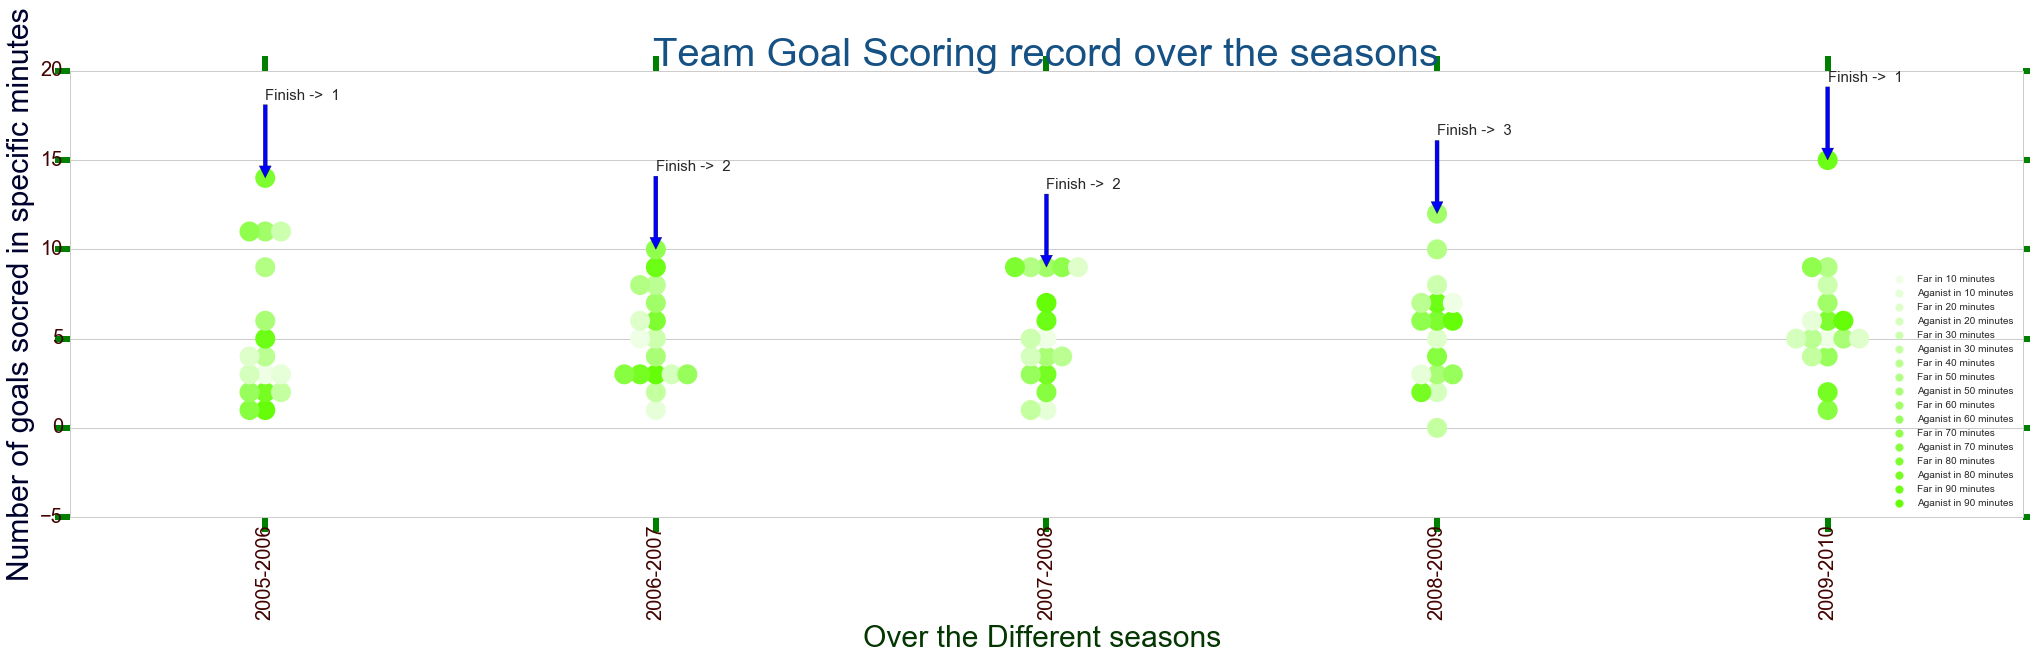

In [85]:
from matplotlib.font_manager import FontProperties

figure, ax3 = plt.subplots(figsize=(35,8),dpi=96)
sns.set_style('whitegrid')
axx = sns.swarmplot(x='Year',y='values_to_plot',hue= 'hue',data=Analysis3_plot_df,size=20,color= "#65fe08")

Annotation_len = len(Annotate_point)

ax3.set_title('Team Goal Scoring record over the seasons',fontsize=40,color='#155084')
labels = ax3.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=20, color='#410200')

labels3 = ax3.get_yticklabels()
plt.setp(labels3, rotation=0, fontsize=20, color='#410200')

plt.xlabel('Over the Different seasons ', fontsize=30, color='#033500')
plt.ylabel('Number of goals socred in specific minutes', fontsize=30, color='#00022e')
#plt.ylim([0,90])
plt.tick_params(axis='both',which='major', width=6,length=15,color='g')



#fontP = FontProperties()
#fontP.set_size('small')
plt.legend(loc=4,prop={'size':10})



for label_idx in range(0,Annotation_len):
    axx.annotate(Postion_text[label_idx], xy=(label_idx, Annotate_point[label_idx]),
        xytext=(label_idx, Annotate_point[label_idx] + 5), 
            arrowprops=dict(facecolor='blue'), 
            horizontalalignment='left', verticalalignment='top',fontsize=15)


plt.savefig(r'C:\Data Analysis\Sujay_DataAnalysis\Final\Output\Analysis3.jpeg')

Analysis3_plot_df_file = "C:\Data Analysis\Sujay_DataAnalysis\Final_Exam\Output\Analysis_3.csv"
Analysis3_plot_df.to_csv(Analysis3_plot_df_file, sep=',', encoding='utf-8')


In [ ]:
#Analysis 4 , Composure

In [35]:
Team_Name4 = "Chelsea"
cnt = 0 

Composure_columns = ['Year','Total Shots', 'Home Shooting Accuracy','Away Shooting Accuracy','Fouls Commited','Being Stupid - Yellow carded','Dirty Fouls - Red Carded','Number of Set Pieces']
all_comp_years = pd.DataFrame(np.nan,index=[0], columns=Composure_columns)
single_comp_year = list(range(8))


for composure_file_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Composure\*.csv",):
    _Composure_df_ = pd.read_csv(composure_file_,error_bad_lines=False)
    
    year = composure_file_.split('\\')[-1].split('.')[0].split('_')[1]

    #Analysis #4 Get only set of Data Needed
    Analysis_4_Data = _Composure_df_[['HomeTeam','AwayTeam','FTHG','FTAG','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']]

    _All_composure_Matches_ = Analysis_4_Data.loc[(Analysis_4_Data["HomeTeam"] == Team_Name4) | (Analysis_4_Data["AwayTeam"] == Team_Name4)]

    _Home_Comp_Matches_ = _All_composure_Matches_.loc[(_All_composure_Matches_["HomeTeam"] == Team_Name4)]
    _Away_Comp_Matches_ = _All_composure_Matches_.loc[(_All_composure_Matches_["AwayTeam"] == Team_Name4)]

    Home_Total_shots = _Home_Comp_Matches_.reset_index().HS.sum()
    Home_Total_shots_on_Target = _Home_Comp_Matches_.reset_index().HST.sum()
    Home_Goals_scored = _Home_Comp_Matches_.reset_index().FTHG.sum()
    Home_Shooting_accuracy = (Home_Goals_scored/Home_Total_shots_on_Target)*100
    Home_Fouls_commited = _Home_Comp_Matches_.reset_index().HF.sum()
    Home_Yellow_cards = _Home_Comp_Matches_.reset_index().HY.sum()
    Home_Red_cards = _Home_Comp_Matches_.reset_index().HR.sum()
    Home_Corners = _Home_Comp_Matches_.reset_index().HC.sum()
    
       
    Away_Total_shots = _Away_Comp_Matches_.reset_index().AS.sum()
    Away_Total_shots_on_Target = _Away_Comp_Matches_.reset_index().AST.sum()
    Away_Goals_scored = _Away_Comp_Matches_.reset_index().FTAG.sum()
    Away_Shooting_accuracy = (Away_Goals_scored/Away_Total_shots_on_Target)*100
    Away_Fouls_commited = _Away_Comp_Matches_.reset_index().AF.sum()
    Away_Yellow_cards = _Away_Comp_Matches_.reset_index().AY.sum()
    Away_Red_cards = _Away_Comp_Matches_.reset_index().AR.sum()
    Away_Corners = _Away_Comp_Matches_.reset_index().AC.sum()
     
        
    Total_Shots = Home_Total_shots + Away_Total_shots
    Total_Fouls = Home_Fouls_commited + Away_Fouls_commited
    Total_Yellow_cards = Home_Yellow_cards + Away_Yellow_cards
    Total_Red_cards = Home_Red_cards + Away_Red_cards
    Total_NUmber_Set_pieces = Home_Corners + Away_Corners
    
    single_comp_year[0] = year
    single_comp_year[1] = Total_Shots
    single_comp_year[2] = Home_Shooting_accuracy
    single_comp_year[3] = Away_Shooting_accuracy
    single_comp_year[4] = Total_Fouls
    single_comp_year[5] = Total_Yellow_cards
    single_comp_year[6] = Total_Red_cards
    single_comp_year[7] = Total_NUmber_Set_pieces
   
    
    single_comp_df = pd.DataFrame([single_comp_year],columns=Composure_columns)

    all_comp_years = all_comp_years.append([single_comp_df],ignore_index=True)
    
    
    cnt += 1
    if cnt == 111: break

all_comp_years = all_comp_years.drop(all_comp_years.index[0])

#all_comp_years

#all_comp_years_file = r"C:\Users\Hp\Desktop\New folder\test.csv"
#all_comp_years.to_csv(all_comp_years_file, sep=',', encoding='utf-8')

In [36]:
league_all_comp_list = []
lll = 0
for League_comp_File in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Composure_league_Table\*.csv"):
    League_comp_df = pd.read_csv(League_comp_File)
    League_comp_df['Year'] = League_comp_File.split('\\')[-1].split('.')[0].split('_')[-1]
    temp_comp_pos_df = League_comp_df[['Year','Pos','Team']]
    temp_comp_pos_df = temp_comp_pos_df.ix[temp_comp_pos_df['Team'].str.contains(Team_Name4)]
    league_all_comp_list.append(temp_comp_pos_df)
    
    lll +=1
    if lll == 17: break
    
Final_comp_league_df = pd.concat(league_all_comp_list)   
Final_comp_league_df.reset_index()

,index,Year,Pos,Team
0,1,2006-2007,2,Chelsea
1,1,2007-2008,2,Chelsea
2,2,2008-2009,3,Chelsea
3,0,2009-2010,1,Chelsea (C)
4,1,2010-2011,2,Chelsea
5,5,2011-2012,6,Chelsea
6,2,2012-2013,3,Chelsea
7,2,2013-2014,3,Chelsea
8,0,2014-2015,1,Chelsea (C)
9,9,2015-2016,10,Chelsea


In [37]:
Analysi4_df =  pd.merge(Final_comp_league_df,all_comp_years,left_on='Year',right_on='Year')
Analysi4_df

,Year,Pos,Team,Total Shots,Home Shooting Accuracy,Away Shooting Accuracy,Fouls Commited,Being Stupid - Yellow carded,Dirty Fouls - Red Carded,Number of Set Pieces
0,2006-2007,2,Chelsea,522.0,25.170068,21.774194,436.0,64.0,4.0,230.0
1,2007-2008,2,Chelsea,497.0,24.161074,23.966942,432.0,65.0,6.0,254.0
2,2008-2009,3,Chelsea,656.0,16.923077,21.341463,417.0,50.0,3.0,236.0
3,2009-2010,1,Chelsea (C),697.0,29.565217,22.151899,441.0,56.0,5.0,285.0
4,2010-2011,2,Chelsea,635.0,22.413793,17.647059,405.0,59.0,1.0,255.0
5,2011-2012,6,Chelsea,616.0,23.163842,15.286624,403.0,75.0,4.0,254.0
6,2012-2013,3,Chelsea,569.0,20.197044,25.563910,371.0,52.0,3.0,240.0
7,2013-2014,3,Chelsea,693.0,31.851852,30.107527,420.0,56.0,3.0,249.0
8,2014-2015,1,Chelsea (C),563.0,29.508197,42.045455,382.0,77.0,4.0,226.0
9,2015-2016,10,Chelsea,526.0,34.408602,33.750000,408.0,58.0,6.0,240.0


In [38]:
Composure_req_cols = ['Total Shots','Home Shooting Accuracy','Away Shooting Accuracy','Fouls Commited','Being Stupid - Yellow carded','Dirty Fouls - Red Carded','Number of Set Pieces']
composure_plot_df = []

for col in Composure_req_cols:
    temp_df = Analysi4_df[['Year',col]]
    temp_df = temp_df.rename(columns={col:'Compsure_Attribute_Values'})
    temp_df['Composure Attributes'] = col
    composure_plot_df.append(temp_df)
    
Analysis4_plot_df = pd.concat(composure_plot_df)

Analysis4_plot_df['Compsure_Attribute_Values'] = Analysis4_plot_df.Compsure_Attribute_Values.apply(lambda Y: int(Y))

In [39]:
#Create Position List 

Postion_comp_list = list(Analysi4_df.Pos)
Postion_comp_list

label = 'Finish ->  '

Postion_comp_text = [label + str(num) for num in Postion_comp_list]
Postion_comp_text

['League Table Finish ->  2',
 'League Table Finish ->  2',
 'League Table Finish ->  3',
 'League Table Finish ->  1',
 'League Table Finish ->  2',
 'League Table Finish ->  6',
 'League Table Finish ->  3',
 'League Table Finish ->  3',
 'League Table Finish ->  1',
 'League Table Finish ->  10',
 'League Table Finish ->  1']

In [40]:
#create Annote arrow location 
Num_years = len(Analysi4_df)
cnt = 0

Annotate_comp_point = []
for year_idx in range(0,Num_years):
    year_to_cal = Analysi4_df['Year'][year_idx]

    Annotate_comp_df = Analysi4_df.ix[Analysi4_df['Year'].str.contains(year_to_cal)]

    Annotate1_comp_df =Annotate_comp_df[['Total Shots','Home Shooting Accuracy','Away Shooting Accuracy','Fouls Commited','Being Stupid - Yellow carded','Dirty Fouls - Red Carded','Number of Set Pieces']]

    Annotate1_comp_df['Annote_point'] = Annotate1_comp_df.max(axis=1)
    Annotate_comp_point.append(int(Annotate1_comp_df['Annote_point']))
    
    cnt += 1
    if cnt == 911: break
        
Annotate_comp_point

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[522, 497, 656, 697, 635, 616, 569, 693, 563, 526, 208]

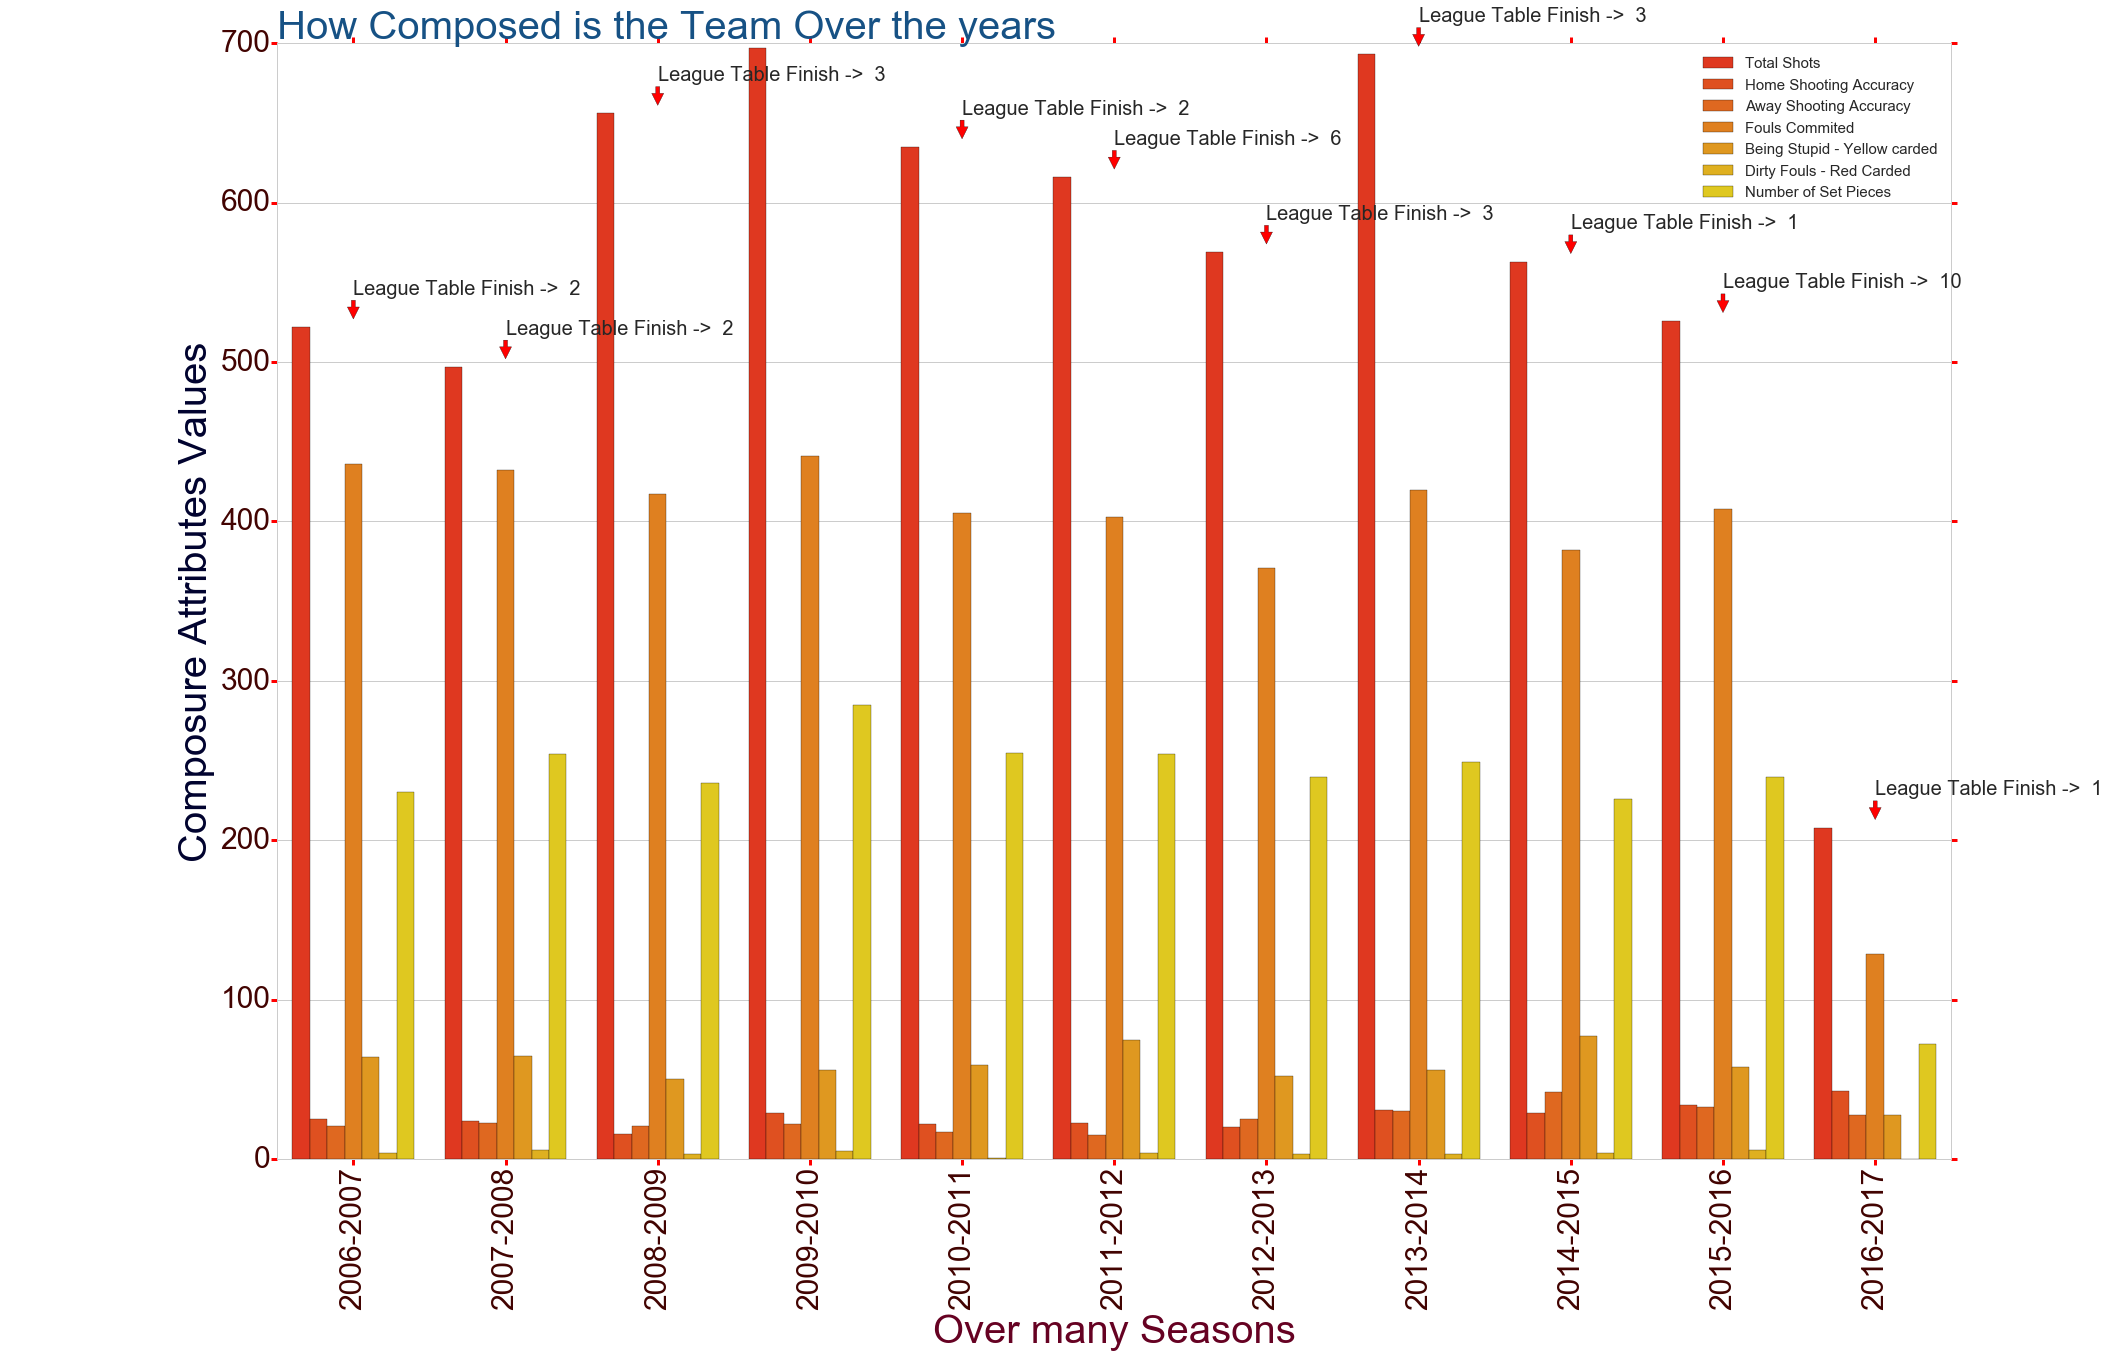

In [41]:
fig, ax4 = plt.subplots(figsize=(30,20), dpi=150)
sns.set_style('whitegrid')

axx = sns.barplot(x='Year',y='Compsure_Attribute_Values',hue= 'Composure Attributes', data = Analysis4_plot_df, palette="autumn")
#axx = sns.stripplot(x='Year',y='values_to_plot',hue= 'hue',data=Analysis4_plot_df,jitter=True)

ax4.set_title('How Composed is the Team Over the years',fontsize=40,color='#155084',loc = 'left')
labels = ax4.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=30, color='#410200')

labels2 = ax4.get_yticklabels()
plt.setp(labels2, rotation=0, fontsize=30, color='#410200')

plt.xlabel('Over many Seasons', fontsize=40, color='#650021')
plt.ylabel('Composure Attributes Values', fontsize=40, color='#00022e')
#plt.ylim([0,90])
plt.tick_params(axis='both',which='major', width=3,length=6,color='r')
plt.legend(loc=1,prop={'size':15})

##plt.savefig(r'C:\Data Analysis\Sujay_DataAnalysis\Final\Output\Analysis2.jpeg')

Annotation_comp_len = len(Annotate_comp_point)

for label_idx in range(0,Annotation_comp_len):
    
    #label = 'League Table Finish ->  '
    axx.annotate(Postion_comp_text[label_idx], xy=(label_idx, Annotate_comp_point[label_idx] + 5),
        xytext=(label_idx, Annotate_comp_point[label_idx] + 30), 
            arrowprops=dict(facecolor='red'), 
            horizontalalignment='left', verticalalignment='top',fontsize=20)
    
    
Analysis4_plot_df_file = r"C:\Data Analysis\Sujay_DataAnalysis\Final_Exam\Output\Analysis_4.csv"
Analysis4_plot_df.to_csv(Analysis4_plot_df_file, sep=',', encoding='utf-8')    

In [ ]:
#Analysis #5  Prediction

In [43]:
Team_Name5 = 'Man United'
Prediction_Teams = ['Man United'  ,'Man City',  'Chelsea', 'Arsenal', 'Tottenham', 'Everton', 'West Ham', 'Liverpool']

cnt = 0

Prediction_list_length = len(Prediction_Teams)
cnt1 = 0
    
predict_columns = ['Team 1 ','Team 2','Home Form','Away Form','Home Wins','Home Losses','Home draws','Away Wins','Away Losses','Away draws']
predict_all_years = pd.DataFrame(np.nan,index=[0], columns=predict_columns)    
predict_single_year = list(range(10))

for pred_team in Prediction_Teams:
    if Team_Name5 == pred_team: continue
    Home_form_list = []
    Away_form_list = []
    
    Home_Wins = 0
    Home_Losses = 0
    Home_draws = 0
    Away_Wins = 0
    Away_Losses = 0
    Away_draws = 0
    
    
    for Prediction_file_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Prediction\*.csv",):
        _prediction_df_ = pd.read_csv(Prediction_file_,error_bad_lines=False)

        year = Prediction_file_.split('\\')[-1].split('.')[0].split('_')[1]

        Analysis_5_Data = _prediction_df_[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]

        _prediction_All_Matches_ = Analysis_5_Data.loc[(Analysis_5_Data["HomeTeam"] == Team_Name5) | (Analysis_5_Data["AwayTeam"] == Team_Name5)]

        _Home_prediction_Matches_ = _prediction_All_Matches_.loc[(_prediction_All_Matches_["HomeTeam"] == Team_Name5)]
        _Away_prediction_Matches_ = _prediction_All_Matches_.loc[(_prediction_All_Matches_["AwayTeam"] == Team_Name5)]

    
        Home_temp_df = _prediction_All_Matches_.loc[(_prediction_All_Matches_["HomeTeam"] == Team_Name5) 
                                                & (_prediction_All_Matches_["AwayTeam"] == pred_team)]
           
        if not Home_temp_df.empty:
            Home_temp_df = Home_temp_df.reset_index()
            if Home_temp_df.FTR[0] == 'H':
                home_form_ch = 'W'
                Home_Wins +=1                
            elif Home_temp_df.FTR[0] == 'A':
                home_form_ch = 'L'
                Home_Losses += 1
            elif Home_temp_df.FTR[0] == 'D':
                home_form_ch = 'D'
                Home_draws += 1

            Home_form_list.append(home_form_ch)
        else:
            Home_form_list.append('') 
    
        Away_temp_df = _prediction_All_Matches_.loc[(_prediction_All_Matches_["HomeTeam"] == pred_team) 
                                                   & (_prediction_All_Matches_["AwayTeam"] == Team_Name5)]
    
        if not Away_temp_df.empty:
            Away_temp_df = Away_temp_df.reset_index()
            if Away_temp_df.FTR[0] == 'H':
                away_form_ch = 'W'
                Away_Wins += 1
            elif Away_temp_df.FTR[0] == 'A':
                away_form_ch = 'L'
                Away_Losses += 1
            elif Away_temp_df.FTR[0] == 'D':
                away_form_ch = 'D'
                Away_draws += 1

            Away_form_list.append(away_form_ch)
        else:
            Away_form_list.append('')
        
        cnt +=1 
        if cnt == 30: break
        
    predict_single_year[0] =  Team_Name5
    predict_single_year[1] =  pred_team
    predict_single_year[2] =  ' '.join(Home_form_list) 
    predict_single_year[3] =  ' '.join(Away_form_list)
    predict_single_year[4] =  Home_Wins
    predict_single_year[5] =  Home_Losses
    predict_single_year[6] =  Home_draws
    predict_single_year[7] =  Away_Wins
    predict_single_year[8] =  Away_Losses
    predict_single_year[9] =  Away_draws
    
    predict_single_df = pd.DataFrame([predict_single_year],columns=predict_columns)
    
    predict_all_years = predict_all_years.append([predict_single_df],ignore_index=True)

    cnt1 += 1
    if cnt1 == 10: break
        

print(Home_form_list)
print(Away_form_list)


predict_all_years = predict_all_years.drop(predict_all_years.index[0])
#predict_all_years

#predict_all_years_file = r"C:\Users\Hp\Desktop\New folder\test.csv"
#predict_all_years.to_csv(predict_all_years_file, sep=',', encoding='utf-8') 

['W', 'W', 'L', 'W', 'W', 'W', 'W', 'L', 'W', 'W', '']
['L', 'L', 'W', 'W', 'W', 'D', 'L', 'W', 'L', 'L', 'D']


In [ ]:
#prediction algorithm
#1.  previous years  at this point average wins and    30 
#2  Previous meetings with team   30 
#3  Current form                  40
 

In [44]:
def current_form(Home_team, Away_team, Result):
    
    if (Home_team == Team_Name5) and (Away_team != Team_Name5):
        if Result == 'H':
            return 'W'
        if Result == 'A':
            return 'L'
        if Result == 'D':
            return 'D'        
    if (Home_team != Team_Name5) and (Away_team == Team_Name5):
        if Result == 'H':
            return 'L'     
        if Result == 'A':
            return 'W'         
        if Result == 'D':
            return 'D'         

temp_file = pd.read_csv(r'C:\Data Analysis\Sujay_DataAnalysis\Final\Prediction\EPL_2016-2017.csv')
Average_Predict_file = temp_file[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
_Average_predict_df_ = Average_Predict_file.loc[(Average_Predict_file["HomeTeam"] == Team_Name5) | (Average_Predict_file["AwayTeam"] == Team_Name5)]

_Average_predict_df_ = _Average_predict_df_.reset_index()

_Current_Home_Matches_ = _Average_predict_df_.loc[(_Average_predict_df_["HomeTeam"] == Team_Name5)]
_Current_Away__Matches_ = _Average_predict_df_.loc[(_Average_predict_df_["AwayTeam"] == Team_Name5)]

        
_AverageHome_Wins = _Current_Home_Matches_.loc[(_Average_predict_df_["FTR"] == "H")]
_AverageHome_Win_Count = _AverageHome_Wins.FTR.count()

_AverageHome_draw = _Current_Home_Matches_.loc[(_Average_predict_df_["FTR"] == "D")]
_AverageHome_draw_Count = _AverageHome_draw.FTR.count()

_AverageAway_Wins = _Current_Away__Matches_.loc[(_Average_predict_df_["FTR"] == "A")]
_AverageAway_Wins_Count = _AverageAway_Wins.FTR.count()

_AverageAway_draw = _Current_Away__Matches_.loc[(_Average_predict_df_["FTR"] == "D")]
_AverageAway_draw_Count = _AverageAway_draw.FTR.count()


_AverageTotal_Wins = _AverageHome_Win_Count + _AverageAway_Wins_Count
_AverageTotal_Points = ((_AverageTotal_Wins) * 3) + _AverageHome_draw_Count + _AverageAway_draw_Count

_Average_predict_df_['Current Form'] = _Average_predict_df_.apply(lambda X: current_form(X['HomeTeam'],X['AwayTeam'],X['FTR']),axis=1)

_Average_predict_df_

,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Current Form
0,8,14/08/16,Bournemouth,Man United,1,3,A,W
1,10,19/08/16,Man United,Southampton,2,0,H,W
2,23,27/08/16,Hull,Man United,0,1,A,W
3,34,10/09/16,Man United,Man City,1,2,A,L
4,49,18/09/16,Watford,Man United,3,1,H,L
5,53,24/09/16,Man United,Leicester,4,1,H,W
6,68,02/10/16,Man United,Stoke,1,1,D,D
7,79,17/10/16,Liverpool,Man United,0,0,D,D
8,88,23/10/16,Chelsea,Man United,4,0,H,L
9,91,29/10/16,Man United,Burnley,0,0,D,D


In [45]:
Current_league_len = len(_Average_predict_df_)

Max_form_matrix = 0

Current_form_list = list(_Average_predict_df_['Current Form'])

Current_form_list_length = len(Current_form_list)

Current_form_Matrix = 0

for form_idx in range(0,Current_form_list_length):
    if Current_form_list[form_idx] == 'W': 
        Max_form_matrix += 3
        Current_form_Matrix += 3
    elif Current_form_list[form_idx] == 'L':
        Max_form_matrix += 3
        #Current_form_Matrix -= 3    
    if Current_form_list[form_idx] == 'D':
        Max_form_matrix += 3
        Current_form_Matrix += 1
        
Current_form_Matrix
Max_form_matrix

39

In [46]:
temp_value3 = ((Max_form_matrix - Current_form_Matrix)/Max_form_matrix) * 100
temp_value3

48.717948717948715

In [47]:
#making to 15% range
temp_value_4 = (temp_value3 * 40) /100
Predict_value_3 = 40 - temp_value_4
Predict_value_3

20.51282051282051

In [48]:

cnt = 0

predict_avg_columns = ['Total Points','Total Wins']
predict_avg_years = pd.DataFrame(np.nan,index=[0], columns=predict_avg_columns)    
predict_avg_single_year = list(range(2))


for Prediction_file1_ in glob("C:\Data Analysis\Sujay_DataAnalysis\Final\Prediction\*.csv",):
    
    _prediction_df1_ = pd.read_csv(Prediction_file1_,error_bad_lines=False)

    year = Prediction_file1_.split('\\')[-1].split('.')[0].split('_')[1]

    Analysis_5_Data1 = _prediction_df1_[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]

    temp_prediction = Analysis_5_Data1.loc[(Analysis_5_Data1["HomeTeam"] == Team_Name5) | (Analysis_5_Data1["AwayTeam"] == Team_Name5)]
    
    _prediction_All_Matches1_ = temp_prediction.reset_index().loc[:Current_league_len,:]

    _Home_prediction_Matches1_ = _prediction_All_Matches1_.loc[(_prediction_All_Matches1_["HomeTeam"] == Team_Name5)]
    _Away_prediction_Matches1_ = _prediction_All_Matches1_.loc[(_prediction_All_Matches1_["AwayTeam"] == Team_Name5)]
    
    
    Home_Wins = _Home_prediction_Matches1_.loc[(_Home_prediction_Matches1_["FTR"] == "H")]
    Home_Win_Count = Home_Wins.FTR.count()

    Home_draw = _Home_prediction_Matches1_.loc[(_Home_prediction_Matches1_["FTR"] == "D")]
    Home_draw_Count = Home_draw.FTR.count()

    Away_Wins = _Away_prediction_Matches1_.loc[(_Away_prediction_Matches1_["FTR"] == "A")]
    Away_Wins_Count = Away_Wins.FTR.count()

    Away_draw = _Away_prediction_Matches1_.loc[(_Away_prediction_Matches1_["FTR"] == "D")]
    Away_draw_Count = Away_draw.FTR.count()

    Home_Goals_scored = _Home_prediction_Matches1_.FTHG.sum()
    Away_Goals_scored = _Away_prediction_Matches1_.FTAG.sum()
    Home_Goals_conceeded = _Home_prediction_Matches1_.FTAG.sum()
    Away_Goals_conceeded = _Away_prediction_Matches1_.FTHG.sum()
    
    Total_Wins = Away_Wins_Count + Home_Win_Count
    Total_Points = ((Home_Win_Count + Away_Wins_Count) * 3) + Home_draw_Count + Away_draw_Count
    
    predict_avg_single_year[0] =  Total_Points
    predict_avg_single_year[1] =  Total_Wins

    
    predict_avg_single_df = pd.DataFrame([predict_avg_single_year],columns=predict_avg_columns)
    
    predict_avg_years = predict_avg_years.append([predict_avg_single_df],ignore_index=True)
    
    cnt += 1
    if cnt == 19: break

predict_avg_years = predict_avg_years.drop(predict_avg_years.index[0])
predict_avg_years


,Total Points,Total Wins
1,35.0,11.0
2,30.0,9.0
3,28.0,8.0
4,31.0,10.0
5,28.0,7.0
6,33.0,10.0
7,33.0,11.0
8,22.0,6.0
9,25.0,7.0
10,28.0,8.0


In [49]:
Average_Total_point_At_this_point = predict_avg_years['Total Points'].mean()
Average_Total_wins_At_this_point = predict_avg_years['Total Wins'].mean()


In [50]:
#1   How much down 

Current_point_percentage = ((Average_Total_point_At_this_point - _AverageTotal_Points)/ Average_Total_point_At_this_point)* 100
Current_point_percentage

29.712460063897762

In [51]:
#making to 15% range
temp_value_1 = (Current_point_percentage * 15) /100
Predict_value_1 = 15 - temp_value_1
Predict_value_1

10.543130990415335

In [52]:
Current_wins_percentage = ((Average_Total_wins_At_this_point - _AverageTotal_Wins)/ Average_Total_wins_At_this_point)* 100
Current_wins_percentage

40.217391304347821

In [53]:
#making to 15% range
temp_value_2 = (Current_wins_percentage * 15) /100
Predict_value_2 = 15 - temp_value_2
Predict_value_2

8.9673913043478279

In [56]:
def old_form(Home_form):
   
    form_list = Home_form.split(' ')
    form_list_length = len(form_list)
    Max_old_form_matrix  = 0
    Old_form_Matrix = 0
        
    for idx in range(0,form_list_length):
        if form_list[idx] == 'W':
            Max_old_form_matrix += 3
            Old_form_Matrix += 3
        elif form_list[idx] == 'L':
            Max_old_form_matrix  += 3
            Old_form_Matrix -= 3
        elif form_list[idx] == 'D':
            Max_old_form_matrix  += 3
            Old_form_Matrix += 1
    
    temp_value5 = ((Max_old_form_matrix - Old_form_Matrix)/Max_old_form_matrix) * 100
    temp_value_6 = (temp_value5 * 30) /100
    Predict_value_4 = 30 - temp_value_6

    return (Predict_value_1 + Predict_value_2 + Predict_value_3 + Predict_value_4 )

Average_predict_all_years = predict_all_years[['Team 2','Home Form','Away Form','Home Wins','Home Losses','Home draws','Away Wins','Away Losses','Away draws']]
Average_predict_all_years['Home Prediction'] = Average_predict_all_years['Home Form'].apply(old_form,1)
Average_predict_all_years['Away Prediction'] = Average_predict_all_years['Away Form'].apply(old_form,1)
#Average_predict_all_years

Average_predict_all_years_file = r"C:\Data Analysis\Sujay_DataAnalysis\Final_Exam\Output\Analysis_5.csv"
Average_predict_all_years.to_csv(Average_predict_all_years_file, sep=',', encoding='utf-8') 

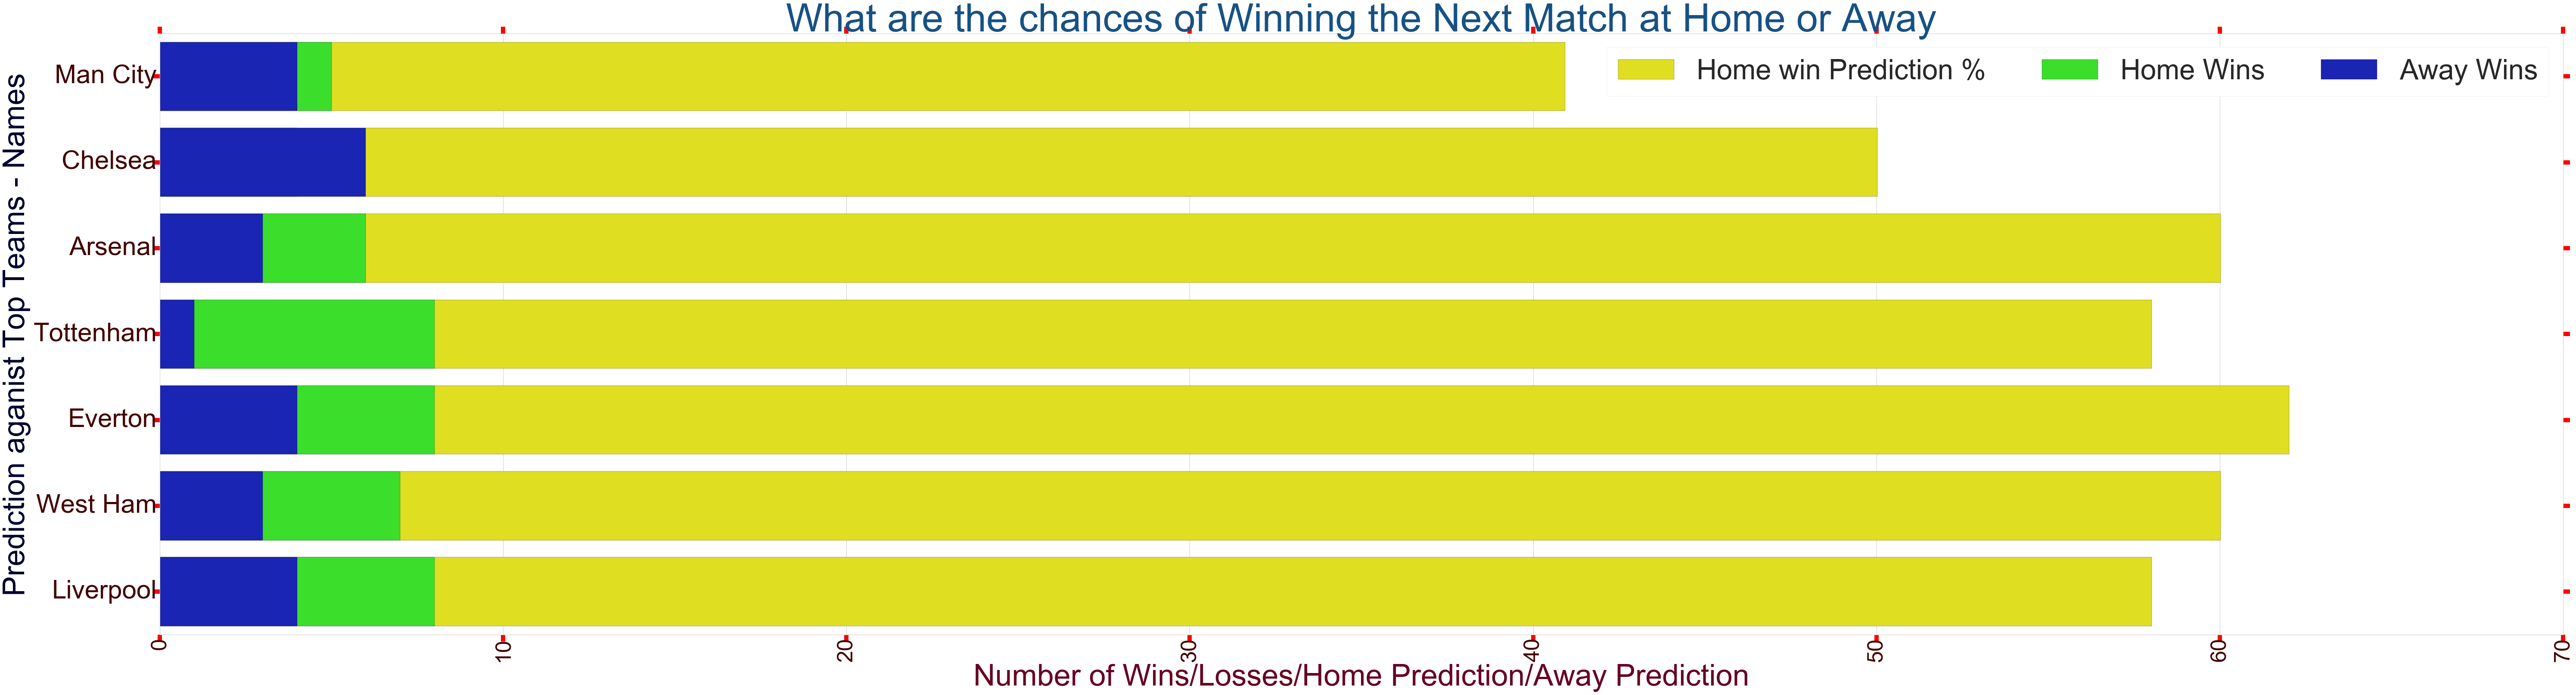

In [57]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax5 = plt.subplots(figsize=(100, 25))

sns.barplot(x="Home Prediction", y="Team 2", data=Average_predict_all_years,
            label="Home win Prediction %", color="#fffd01")

#sns.barplot(x="Away Prediction", y="Team 2", data=Average_predict_all_years,
 #           label="Away win Prediction %", color="#ffda03")

sns.barplot(x="Home Wins", y="Team 2", data=Average_predict_all_years,
            label="Home Wins", color="#21fc0d")

#sns.set_color_codes("muted")
#sns.barplot(x="Home Losses", y="Team 2", data=predict_all_years,
#            label="Home Losses", color="#b6ffbb")

#sns.set_color_codes("bright")
sns.barplot(x="Away Wins", y="Team 2", data=Average_predict_all_years,
            label="Away Wins", color="#010fcc")


ax5.set_title('What are the chances of Winning the Next Match at Home or Away',fontsize=90,color='#155084')
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=50, color='#410200')

labels2 = ax5.get_yticklabels()
plt.setp(labels2, rotation=0, fontsize=60, color='#410200')

plt.xlabel('Number of Wins/Losses/Home Prediction/Away Prediction', fontsize=70, color='#650021')
plt.ylabel('Prediction aganist Top Teams - Names', fontsize=70, color='#00022e')
#plt.ylim([0,90])
plt.tick_params(axis='both',which='major', width=10,length=16,color='r')



ax5.legend(ncol=4, loc="upper right", frameon=True,prop={'size':65})
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
#sns.despine(left=True, bottom=True)


plt.savefig(r'C:\Data Analysis\Sujay_DataAnalysis\Final\Output\Analysis5.jpeg')


